<a href="https://colab.research.google.com/github/ironcevic/modelling_week11/blob/main/results/Practical11_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
"""
Welcome to Google Colab! (yes single l)
Colab is set up in Python.
In Colab, some lines are code and some are comments.
This whole block is a comment because it is encased in quotes.
Comments can also be marked with #.
You can toggle # on and off using "Ctrl + /".
"""

print("Hello, world!") # this is a line of code
# print("This is commented out") # this will not execute as it starts with #

a = 5
# a = "ice cream"
print(a) # is a 5 or ice cream?

"""
You can also run bash commands by pre-appending lines with "!".
Try it below.
There is also a file explorer on the left.
"""

!ls # this is a bash command
!pwd


Hello, world!
5
cumulene.bands.dat	cumulene.dos.in   functions.py	     Practical11.ipynb
cumulene.bands.dat.gnu	cumulene.dos.out  polyene.relax.in   __pycache__
cumulene.bands.dat.rap	cumulene.save	  polyene.relax.out  results
cumulene.bands.in	cumulene.scf.in   polyene.save	     sample_data
cumulene.bands.out	cumulene.scf.out  polyene.scf.in     supercell.xyz
cumulene.dos		cumulene.xml	  polyene.xml	     unitcell.xsf
/content


In [14]:
"""
Here are some more basic examples.
"""
import numpy as np # imports the NumPy library

# Basic printing
print(1 + 1)           # prints: 2

# String variables
my_string = "monster truck"
print(my_string)       # prints: monster truck

# 1D arrays
my_array = np.array([2, 3, 4])
print(my_array[0])     # prints: 2 (first element)
print(my_array[-1])    # prints: 4 (last element)

# 2D arrays
my_2d_array = np.array([[1, 2, 3], [4, 5, 6]])
print(my_2d_array[0])        # prints: [1 2 3] (first row)
print(my_2d_array[0, 1])     # prints: 2 (row 0, column 1)
print(my_2d_array[:, 0])     # prints: [1 4] (first column)
print(my_2d_array.T[0])      # prints: [1 4] (first column via transpose)

2
monster truck
2
4
[1 2 3]
2
[1 4]
[1 4]


In [15]:
"""
Here we will install Quantum Espresso and load the modules we need.
"""

!sudo apt-get update
!sudo apt-get install -y quantum-espresso
!pip install ase
!git clone https://github.com/ironcevic/modelling_week11.git
!mv modelling_week11/* .
!rm -r modelling_week11
from functions import *


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [16]:
"""
Inspect cumulene.scf.in by double-clicking on it.
How many k-points will this calculation include?

Using the provided code, convert the geometry into .xsf .xyz files and visualise
them on your local computer. This is done by creating a python object, atoms,
and writing it to a file. After executing the code below, download
"unitcell.xsf" and "supercell.xyz" and open them using Vesta and Avogadro,
respectively.
"""

atoms = read('cumulene.scf.in', format='espresso-in') # load geometry
write('unitcell.xsf', atoms) # write the atoms object as an xsf
supercell = atoms.repeat((10, 1, 1)) # create supercell object
write('supercell.xyz', supercell) # write supercell object as xyz



In [7]:
"""
Run a single-point calculation by executing the code below.
This will take ~1 min 50 s.
Inspect the output file and determine the Fermi energy and the total energy.
"""

!pw.x < cumulene.scf.in > cumulene.scf.out


In [17]:
"""
Now we shall run a density of states (DOS) post-processing calculation.
Inspect cumulene.dos.in.
How many eV in each direction relative to E_F does it include?
Run the code below. Which files does it produce?
"""

!dos.x < cumulene.dos.in > cumulene.dos.out


[-8.       1.438    0.01438]
[-8.   -7.99 -7.98 ...  2.98  2.99  3.  ]


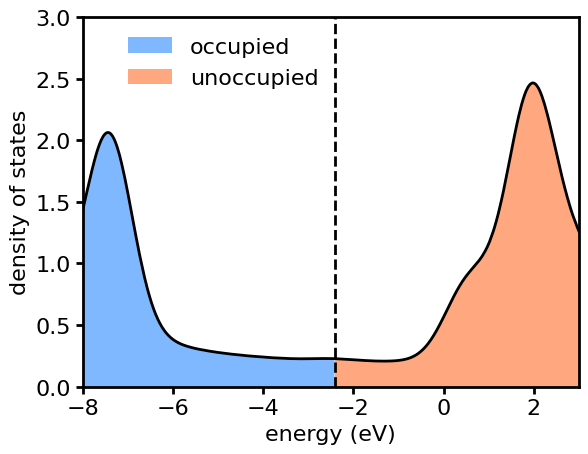

In [18]:
"""
Using the provided code, create the dos object.
How does it compare to the cumulene.dos file?
Plot the density of states using the provided code.
Is cumulenic \textit{trans}-polyacetylene an insulator or a conductor?
"""

dos = np.genfromtxt("cumulene.dos", skip_header=1) # create the dos object

print(dos[0]) # what does this print?
print(dos.T[0]) # how about this?

fermi_level = -2.4177 # find in the scf output
energy_limits = [-8, 3] # where do we plot the energy

# this below prints the DOS
plt.plot(dos[:, 0], dos[:, 1], color = 'k') # plot the dos as a black line
plt.axvline(fermi_level, linestyle='dashed', color = "k") # fermi energy
# the next two lines make a fill with a colour depending on occupancy
plt.fill_between(dos[:, 0], dos[:, 1], where=(dos[:, 0] < fermi_level),
                 facecolor=colours["blue"], alpha=0.5, label='occupied')
plt.fill_between(dos[:, 0], dos[:, 1], where=(dos[:, 0] >= fermi_level),
                 facecolor=colours["orange"], alpha=0.5, label='unoccupied')
plt.xlabel("energy (eV)")
plt.ylabel("density of states")
plt.xlim(energy_limits)
plt.ylim(0, 3)
plt.legend(loc="upper left", frameon=False, bbox_to_anchor=(0.05, 1))
plt.show()

In [10]:
"""
Let us now plot the band structure. First we run a post-processing calculation.
Run the code below. Which files does it produce?
"""

!bands.x < cumulene.bands.in > cumulene.bands.out


(909, 2)
(9, 101, 2)
[[ 0.00000e+00 -1.94627e+01]
 [ 5.00000e-03 -1.94623e+01]
 [ 1.00000e-02 -1.94610e+01]
 [ 1.50000e-02 -1.94589e+01]
 [ 2.00000e-02 -1.94559e+01]
 [ 2.50000e-02 -1.94521e+01]
 [ 3.00000e-02 -1.94474e+01]
 [ 3.50000e-02 -1.94419e+01]
 [ 4.00000e-02 -1.94355e+01]
 [ 4.50000e-02 -1.94283e+01]
 [ 5.00000e-02 -1.94202e+01]
 [ 5.50000e-02 -1.94113e+01]
 [ 6.00000e-02 -1.94015e+01]
 [ 6.50000e-02 -1.93909e+01]
 [ 7.00000e-02 -1.93794e+01]
 [ 7.50000e-02 -1.93671e+01]
 [ 8.00000e-02 -1.93540e+01]
 [ 8.50000e-02 -1.93400e+01]
 [ 9.00000e-02 -1.93251e+01]
 [ 9.50000e-02 -1.93094e+01]
 [ 1.00000e-01 -1.92928e+01]
 [ 1.05000e-01 -1.92754e+01]
 [ 1.10000e-01 -1.92572e+01]
 [ 1.15000e-01 -1.92381e+01]
 [ 1.20000e-01 -1.92182e+01]
 [ 1.25000e-01 -1.91974e+01]
 [ 1.30000e-01 -1.91758e+01]
 [ 1.35000e-01 -1.91533e+01]
 [ 1.40000e-01 -1.91301e+01]
 [ 1.45000e-01 -1.91059e+01]
 [ 1.50000e-01 -1.90810e+01]
 [ 1.55000e-01 -1.90552e+01]
 [ 1.60000e-01 -1.90285e+01]
 [ 1.65000e-01 -1.9001

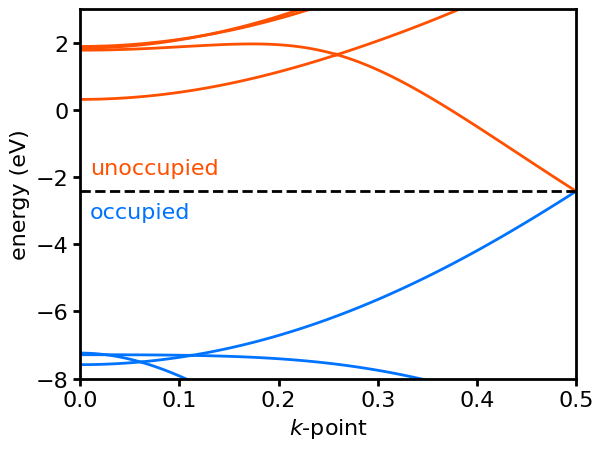

Valence band effective mass is 0.0155.
Conduction band effective mass is 0.0153.


In [19]:
"""
Let us now plot the band structure.
Create the bands object using the provided code.
Compare it to the cumulene.bands.dat.gnu file.
Plot the band structure using the provided code.
Is cumulenic trans-polyacetylene an insulator or a conductor?
Using the provided code, compute the VB and CB effective masses.
"""

bands = np.genfromtxt("cumulene.bands.dat.gnu") # create the bands object
print(np.shape(bands)) # what is its shape? compare with the .gnu file
bands = np.split(bands, 9) # split it into 9 bands
print(np.shape(bands)) # what is its shape now?
print(bands[0]) # try printing the energies of the first band!

fermi_level = -2.4177 # find in the scf output
energy_limits = [-8, 3] # the energy range to plot

# here below we shall plot the band structure
for band in bands:
    x = band[:, 0]
    y = band[:, 1]
    # can you figure out what the four lines below do?
    if np.all(y < fermi_level):
        plt.plot(x, y, color=colours["blue"])
    else:
        plt.plot(x, y, color=colours["orange"])
plt.ylim(energy_limits)
plt.xlim(0, 0.5)
plt.axhline(y=fermi_level, color='k', linestyle='--')
plt.xlabel(r"$k$-point")
plt.ylabel("energy (eV)")
plt.annotate("occupied", xy=(0.01, fermi_level-0.8), color=colours["blue"])
plt.annotate("unoccupied", xy=(0.01, fermi_level+0.5), color=colours["orange"])
plt.show()

# Determine the effective masses.
mass_vb = effective_mass(bands[4][:, 0], bands[4][:, 1], a=2.46, n_points=5)
mass_cb = effective_mass(bands[5][:, 0], bands[5][:, 1], a=2.46, n_points=5)
print(f"Valence band effective mass is {np.abs(np.round(mass_vb, 4))}.")
print(f"Conduction band effective mass is {np.abs(np.round(mass_cb, 4))}.")


In [12]:
"""
All these results were obtained for a cumulenic geometry.
Let's now relax the geometry and do it all again.
Inspect polyene.relax.in. Which new keywords does it have?
How many k-points will it include?
Insert a desymmetrised geometry in polyene.relax.in and run the code below.
What do you expect to get?
With a reasonable starting geometry this takes 4-5 min.
"""

!pw.x < polyene.relax.in > polyene.relax.out


In [20]:
"""
Inspect polyene.relax.out. Paste the optimised geometry into cumulene.scf.in.
Visualise the geometry by adapting the code from the cumulene section.
"""

atoms = read('polyene.scf.in', format='espresso-in') # load geometry
write('unitcell-poly.xsf', atoms) # write the atoms object as an xsf
supercell = atoms.repeat((10, 1, 1)) # create supercell object
write('supercell-poly.xyz', supercell) # write supercell object as xyz


In [21]:
"""
Perform a single-point calculation at the newly optimised geometry by running
the code below. About 2 min.
"""

!pw.x < polyene.scf.in > polyene.scf.out


In [22]:
"""
By adapting the input files and the code from above, compute and visualise
the density of states and the band structure. Note: you first need to prepare
the polyene.dos.in and polyene.bands.in files.
Is polyenic trans-polyacetylene a metal or an insulator?
Determine the effective mass of polyenic trans-polyacetylene.
"""

!dos.x < polyene.dos.in > polyene.dos.out
!bands.x < polyene.bands.in > polyene.bands.out



[-8.        0.8827    0.008827]
[-8.   -7.99 -7.98 ...  2.98  2.99  3.  ]


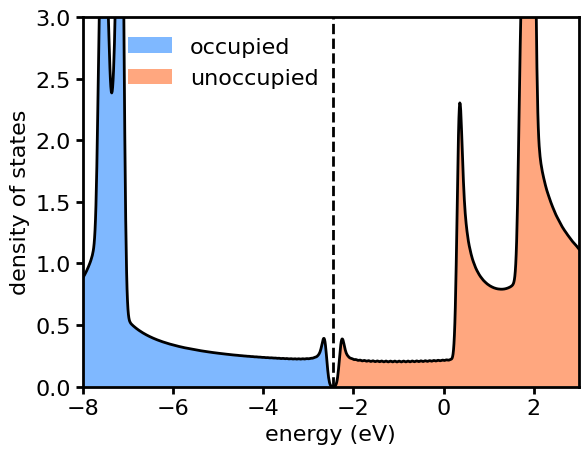

In [23]:

dos = np.genfromtxt("polyene.dos", skip_header=1) # create the dos object

print(dos[0]) # what does this print?
print(dos.T[0]) # how about this?

fermi_level = -2.4510 # find in the scf output
energy_limits = [-8, 3] # where do we plot the energy

# this below prints the DOS
plt.plot(dos[:, 0], dos[:, 1], color = 'k') # plot the dos as a black line
plt.axvline(fermi_level, linestyle='dashed', color = "k") # fermi energy
# the next two lines make a fill with a colour depending on occupancy
plt.fill_between(dos[:, 0], dos[:, 1], where=(dos[:, 0] < fermi_level),
                 facecolor=colours["blue"], alpha=0.5, label='occupied')
plt.fill_between(dos[:, 0], dos[:, 1], where=(dos[:, 0] >= fermi_level),
                 facecolor=colours["orange"], alpha=0.5, label='unoccupied')
plt.xlabel("energy (eV)")
plt.ylabel("density of states")
plt.xlim(energy_limits)
plt.ylim(0, 3)
plt.legend(loc="upper left", frameon=False, bbox_to_anchor=(0.05, 1))
plt.show()

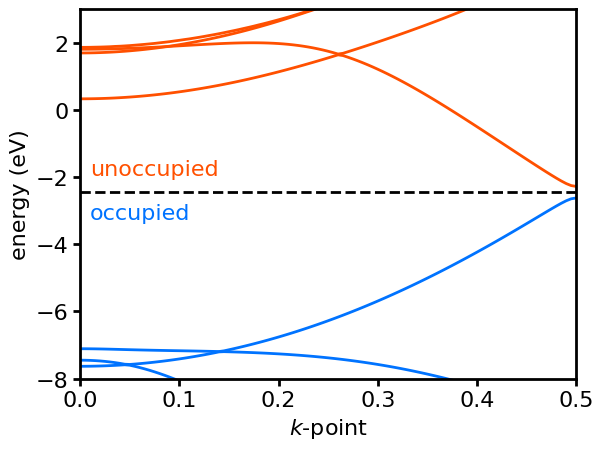

Valence band effective mass is 0.0306.
Conduction band effective mass is 0.03.


In [24]:

bands = np.genfromtxt("polyene.bands.dat.gnu") # create the bands object
bands = np.split(bands, 9) # split it into 9 bands

energy_limits = [-8, 3] # the energy range to plot

# here below we shall plot the band structure
for band in bands:
    x = band[:, 0]
    y = band[:, 1]
    # can you figure out what the four lines below do?
    if np.all(y < fermi_level):
        plt.plot(x, y, color=colours["blue"])
    else:
        plt.plot(x, y, color=colours["orange"])
plt.ylim(energy_limits)
plt.xlim(0, 0.5)
plt.axhline(y=fermi_level, color='k', linestyle='--')
plt.xlabel(r"$k$-point")
plt.ylabel("energy (eV)")
plt.annotate("occupied", xy=(0.01, fermi_level-0.8), color=colours["blue"])
plt.annotate("unoccupied", xy=(0.01, fermi_level+0.5), color=colours["orange"])
plt.show()

# Determine the effective masses.
mass_vb = effective_mass(bands[4][:, 0], bands[4][:, 1], a=2.46, n_points=5)
mass_cb = effective_mass(bands[5][:, 0], bands[5][:, 1], a=2.46, n_points=5)
print(f"Valence band effective mass is {np.abs(np.round(mass_vb, 4))}.")
print(f"Conduction band effective mass is {np.abs(np.round(mass_cb, 4))}.")